In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

dataset = pd.read_csv('adm_data.csv')


In [5]:
dataset.columns = dataset.columns.str.replace(' ', '_')
print(dataset.head())

   Serial_No.  GRE_Score  TOEFL_Score  University_Rating  SOP  LOR_  CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance_of_Admit_  
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [7]:
# Vypočítání průměru a mediánu pro sloupec TOEFL_Score
toefl_mean = dataset['TOEFL_Score'].mean()
toefl_median = dataset['TOEFL_Score'].median()

print("Průměr TOEFL skóre: ", toefl_mean)
print("Medián TOEFL skóre: ", toefl_median)

Průměr TOEFL skóre:  107.41
Medián TOEFL skóre:  107.0


In [8]:
# Výpočet směrodatné odchylky pro TOEFL_Score
toefl_std = dataset['TOEFL_Score'].std()

print("Směrodatná odchylka TOEFL skóre: ", toefl_std)

Směrodatná odchylka TOEFL skóre:  6.069513777374126


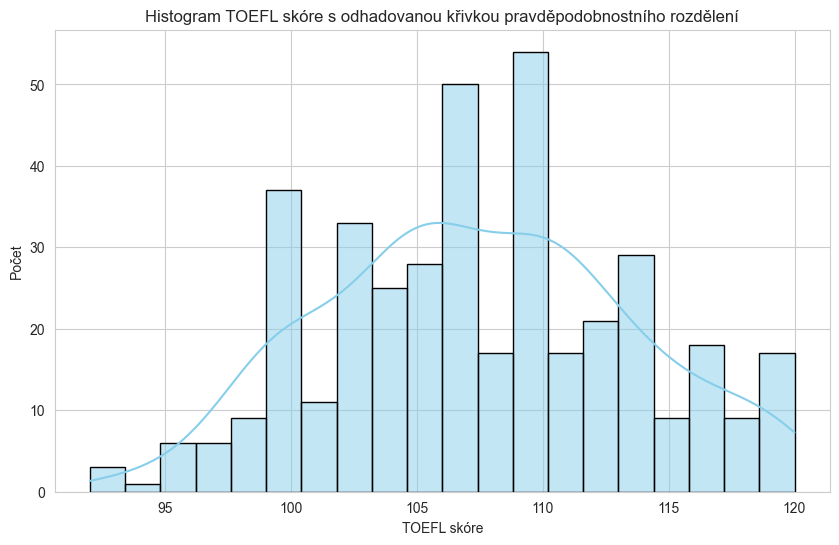

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Styl grafu
sns.set_style('whitegrid')

# Vytvoření histogramu
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='TOEFL_Score', kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram TOEFL skóre s odhadovanou křivkou pravděpodobnostního rozdělení')
plt.xlabel('TOEFL skóre')
plt.ylabel('Počet')
plt.show()

In [13]:
alpha = 0.05

from scipy.stats import shapiro

# Provádění Shapiro-Wilkova testu
stat, p_value = shapiro(dataset['TOEFL_Score'])

print("Shapiro-Wilkův test:")
print("Statistika testu:", stat)
print("p-hodnota:", p_value)

# Interpretace výsledků
if p_value > alpha:
    print("Nulová hypotéza není zamítnuta - data jsou vybrána z normálního rozdělení.")
else:
    print("Nulová hypotéza je zamítnuta - data nejsou vybrána z normálního rozdělení.")

Shapiro-Wilkův test:
Statistika testu: 0.987320065498352
p-hodnota: 0.0014668764779344201
Nulová hypotéza je zamítnuta - data nejsou vybrána z normálního rozdělení.


In [14]:
# Rozdělení dat na základě sloupce "Research"
with_experience = dataset[dataset['Research'] == 1]
without_experience = dataset[dataset['Research'] == 0]

# Zobrazení počtu studentů v každé ze skupin
print("Počet studentů s zkušenostmi s výzkumem:", len(with_experience))
print("Počet studentů bez zkušeností s výzkumem:", len(without_experience))

Počet studentů s zkušenostmi s výzkumem: 219
Počet studentů bez zkušeností s výzkumem: 181


In [16]:
# Spočítání průměrného GRE skóre pro studenty s a bez zkušeností s výzkumem
average_gre_with_exp = with_experience['GRE_Score'].mean()
average_gre_without_exp = without_experience['GRE_Score'].mean()

print("Průměrné GRE skóre pro studenty s zkušenostmi s výzkumem:", average_gre_with_exp)
print("Průměrné GRE skóre pro studenty bez zkušeností s výzkumem:", average_gre_without_exp)

Průměrné GRE skóre pro studenty s zkušenostmi s výzkumem: 322.85388127853884
Průměrné GRE skóre pro studenty bez zkušeností s výzkumem: 309.49171270718233


In [18]:
alpha = 0.05
from scipy.stats import ttest_ind

# T-test pro porovnání průměrného GRE skóre mezi dvěma skupinami
t_statistic, p_value = ttest_ind(with_experience['GRE_Score'], without_experience['GRE_Score'])

print("Výsledky t-testu:")
print("T-statistika:", t_statistic)
print("p-hodnota:", p_value)

# Interpretace výsledků
if p_value < alpha:
    print("Nulová hypotéza je zamítnuta. Existuje statisticky významný rozdíl v GRE skóre mezi dvěma skupinami studentů.")
else:
    print("Nulová hypotéza není zamítnuta. Neexistuje statisticky významný rozdíl v GRE skóre mezi dvěma skupinami studentů.")

Výsledky t-testu:
T-statistika: 14.218609390981028
p-hodnota: 2.168740602699294e-37
Nulová hypotéza je zamítnuta. Existuje statisticky významný rozdíl v GRE skóre mezi dvěma skupinami studentů.


In [19]:
# výpočet korelačního koeficientu mezi TOEFL skóre a GRE skóre
correlation = dataset['TOEFL_Score'].corr(dataset['GRE_Score'])

print("Pearsonův korelační koeficient mezi TOEFL skóre a GRE skóre:", correlation)

Pearsonův korelační koeficient mezi TOEFL skóre a GRE skóre: 0.8359768030143961


Pearsonův korelační koeficient mezi TOEFL skóre a GRE skóre: 0.8359768030143961 
Tato hodnota naznačuje silný lineární vztah mezi TOEFL a GRE score. Tento pozitivní vztah je důležitým zjištěním pro přijímací procesy na univerzitě, protože naznačuje, že studenti s vysokým TOEFL skóre budou dosahovat vysokých výsledků v GRE scoringu.

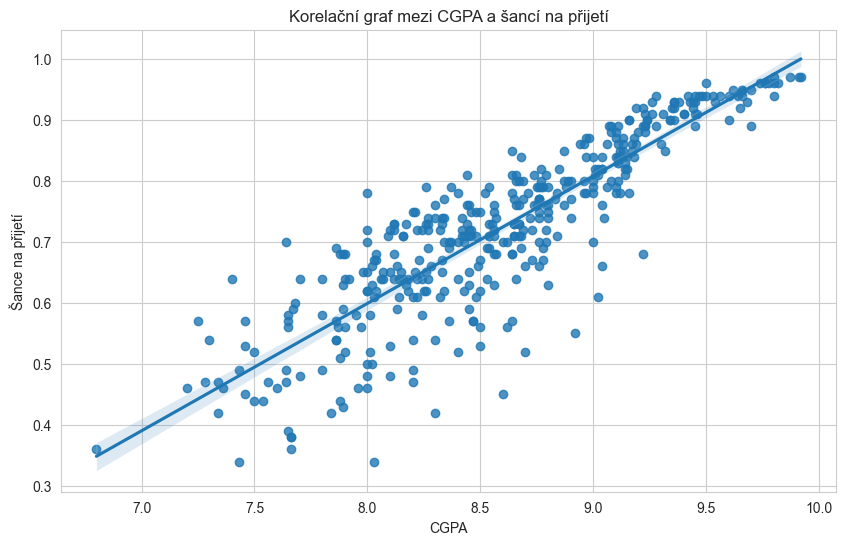

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Zjistění nejvíc korelované proměnné se sloupcem "Chance of Admit"
most_correlated_variable = dataset.drop(columns=['Chance_of_Admit_']).corrwith(dataset['Chance_of_Admit_']).idxmax()

# Vytvoření korelačního grafu
plt.figure(figsize=(10, 6))
sns.regplot(x=most_correlated_variable, y='Chance_of_Admit_', data=dataset)
plt.title('Korelační graf mezi {} a šancí na přijetí'.format(most_correlated_variable))
plt.xlabel(most_correlated_variable)
plt.ylabel('Šance na přijetí')
plt.show()

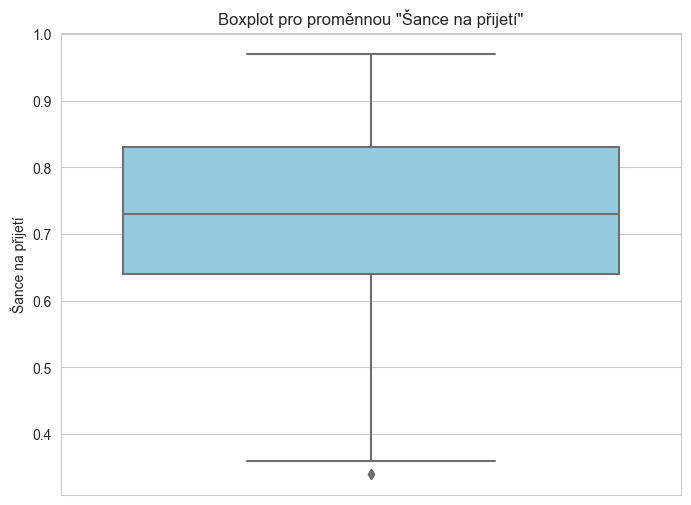

In [23]:
# Vytvoření boxplotu pro proměnnou "Chance of Admit"
plt.figure(figsize=(8, 6))
sns.boxplot(y='Chance_of_Admit_', data=dataset, color='skyblue')
plt.title('Boxplot pro proměnnou "Šance na přijetí"')
plt.ylabel('Šance na přijetí')
plt.show()

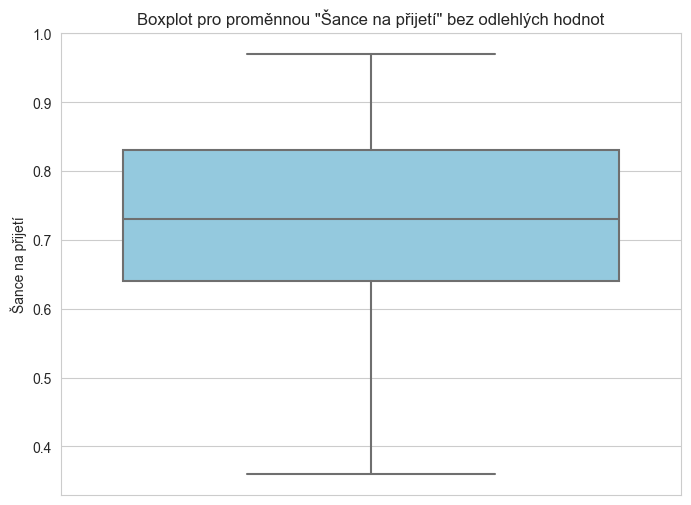

In [25]:
# Výpočet kvartilů a IQR
Q1 = dataset['Chance_of_Admit_'].quantile(0.25)
Q3 = dataset['Chance_of_Admit_'].quantile(0.75)
IQR = Q3 - Q1

# Identifikace odlehlých hodnot
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrujeme dataset, abychom odstranili odlehlé hodnoty
filtered_data = dataset[(dataset['Chance_of_Admit_'] >= lower_bound) & (dataset['Chance_of_Admit_'] <= upper_bound)]

# Vytvoření boxplotu pro filtrovaná data
plt.figure(figsize=(8, 6))
sns.boxplot(y='Chance_of_Admit_', data=filtered_data, color='skyblue')
plt.title('Boxplot pro proměnnou "Šance na přijetí" bez odlehlých hodnot')
plt.ylabel('Šance na přijetí')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

X = dataset.drop(columns=['Serial_No.', 'Chance_of_Admit_'])  # Vstupní proměnné
y = dataset['Chance_of_Admit_']  # Výstupní proměnná

# Vytvoření a trénování modelu lineární regrese
model = LinearRegression()
model.fit(X, y)

# Získání koeficientů regrese
coefficients = model.coef_
intercept = model.intercept_

# Výpis koeficientů
print("Koeficienty:")
for i, col in enumerate(X.columns):
    print(f"{col}: {coefficients[i]}")

print(f"Intercept: {intercept}")

Koeficienty:
GRE_Score: 0.00173741157101406
TOEFL_Score: 0.0029195768169251284
University_Rating: 0.005716658134921053
SOP: -0.003305169045066326
LOR_: 0.022353127328359406
CGPA: 0.11893945359703179
Research: 0.024525106295323527
Intercept: -1.2594324782480149


Každý bod navýšení výsledku jednotlivých proměnných o jednotku koeficientu je spojen s přibližným zvýšením pravděpodobnosti přijetí o daný koeficient, za předpokladu, že všechny ostatní proměnné zůstávají stejné.

In [30]:
from sklearn.metrics import r2_score

# Predikce hodnot
y_pred = model.predict(X)

# Vypočtení R^2
r2 = r2_score(y, y_pred)
print("Koeficient determinace R^2:", r2)

Koeficient determinace R^2: 0.8034713719824396


Čím více se tato hodnota blíží 1, tím lépe model vysvětlije variabilitu v datech. 

Cookovy vzdálenosti:
Body 1: 0.0004233377189515913
Body 2: 0.0007714387307979686
Body 3: 0.002326524757571353
Body 4: 0.0016162111078386605
Body 5: 8.970953462662023e-05
Body 6: 0.0009126777033318052
Body 7: 0.0009369100345222567
Body 8: 0.0037582128443139403
Body 9: 0.0014404608626017563
Body 10: 0.030941632508259317
Body 11: 0.02495225886569994
Body 12: 9.984538128468136e-07
Body 13: 0.0013087390739653438
Body 14: 0.0003861642823150529
Body 15: 0.0004908627985330717
Body 16: 0.0045754106602965
Body 17: 0.0011281459151255915
Body 18: 1.4288667699326407e-06
Body 19: 0.004993771334949076
Body 20: 0.0004203534677039554
Body 21: 0.0007570207168683951
Body 22: 3.887244241396829e-05
Body 23: 6.433590320474656e-05
Body 24: 3.525665491097639e-05
Body 25: 0.00016536483016324222
Body 26: 0.00024502267085563847
Body 27: 8.98727970175223e-06
Body 28: 0.007180008073689811
Body 29: 0.0007794136808536912
Body 30: 0.0028482215597151242
Body 31: 0.0019014871171219847
Body 32: 0.0007367904646980846
Bod

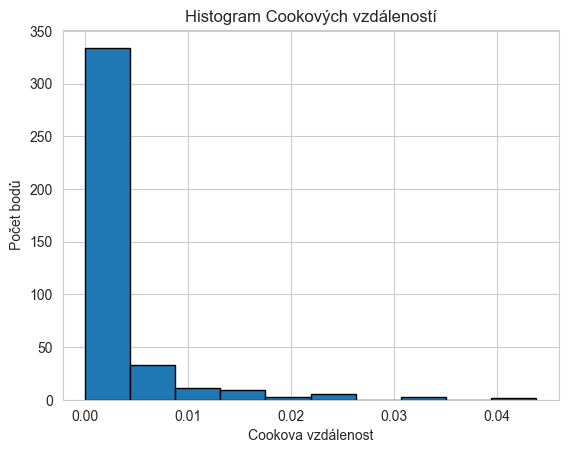

In [31]:
import statsmodels.api as sm

# Přidání konstanty pro intercept
X = sm.add_constant(X)

# Vytvoření a trénování modelu
model = sm.OLS(y, X).fit()

# Výpočet Cookových vzdáleností
cook_distance = model.get_influence().cooks_distance[0]

# Výpis Cookových vzdáleností
print("Cookovy vzdálenosti:")
for i, distance in enumerate(cook_distance):
    print(f"Body {i+1}: {distance}")

# Histogram Cookových vzdáleností
import matplotlib.pyplot as plt

plt.hist(cook_distance, bins=10, edgecolor='black')
plt.xlabel('Cookova vzdálenost')
plt.ylabel('Počet bodů')
plt.title('Histogram Cookových vzdáleností')
plt.show()

Vysoké hodnoty Cookových vzdáleností mohou naznačovat body, které by mohly výrazně ovlivnit regresní model a měly by být případně dále zkoumány.